Curva de ajuste com coeficientes: [[  5.01922367e+05  -7.44828352e+02   3.67136165e-01  -6.00800873e-05]]


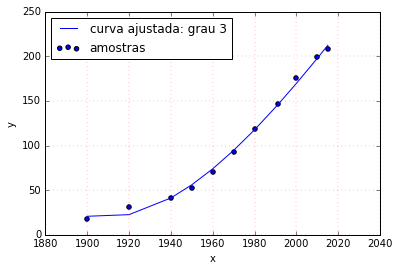

In [255]:
'''
Regressão Polinomial (ajuste de curvas por polinômios): caso discreto
'''


'''
Interface com matplotlib 
[inline]: plotagens diretas
[notebook]: plotagens com janela interativa 
'''
%matplotlib inline 
# %matplotlib notebook 


# modulos
import numpy as np
import matplotlib.mlab as mlab # comandos compatíveis com Matlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm # submodulo colormap 

''' inicio de codigo '''

# pontos de ajuste
X = np.array([1900.0, 1920.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0, 1991.0, 2000.0, 2010.0, 2015.0])

# valores amostrados 
Y = np.array([17.4, 30.6, 41.2, 51.9, 70.2, 93.1, 119.0, 146.2, 175.8, 198.6, 207.8])

# ordem do polinomio de regressao
p = 3

# necessarios p+1 pontos 
K = p + 1

# teste
m = X.size
n = Y.size

if not m == n:
    raise AssertionError("Pontos e valores de amostras com quantidades distintas: m != n")

# lista contendo funcoes da base polinomial
f = []
for i in range(0,K):
    f.append(lambda x, z=i: x**z)

# matriz dos produtos internos 
A = np.zeros(shape=(K,K))

# vetor dos produtos internos 
b = np.zeros(shape=(K,1))

# preenchendo
for i in range(0,K):    

    b[i] = np.dot(Y,f[i](X)) # <f,gi>
    
    for j in range(0,K):
        A[i,j] = np.dot(f[i](X),f[j](X)) # <gi,gj>

# coeficientes de ajuste
coefs = np.linalg.solve(A,b)

# curva de ajuste
cfit = 0.0
for i in range(0,K):
    cfit += coefs[i]*(X**i)

print 'Curva de ajuste com coeficientes:', coefs.T

# plotagem
fig, ax = plt.subplots()
plt.grid('on',ls=':',linewidth=0.25,color='red')
plt.scatter(X,Y)
plt.hold(True)
plt.plot(X,cfit)
plt.xlabel('x')
plt.ylabel('y')
s = 'curva ajustada: grau' + ' ' + str(p)
plt.legend([s,'amostras'],loc=0)

    